In [295]:
# Import the warnings module and set it to ignore any warnings
import warnings 
warnings.filterwarnings("ignore")

# Import necessary data science libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Plotly libraries for more interactive and visually appealing plots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Import necessary machine learning libraries
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [296]:
# Reading data from the file named as "dataset.csv"
# The value inside the read_csv can be modified to match the path to the datafile being used.
data=pd.read_csv("/content/dataset.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [297]:
# Droping the null values from the dataframe "data"
data.dropna(inplace = True)

# Shuffling data so that we can remove any dependicies on the ordinal number of dataframe
from sklearn.utils import shuffle
data = shuffle(data)

# Printing the dataframe information for reference
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 137 to 185
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


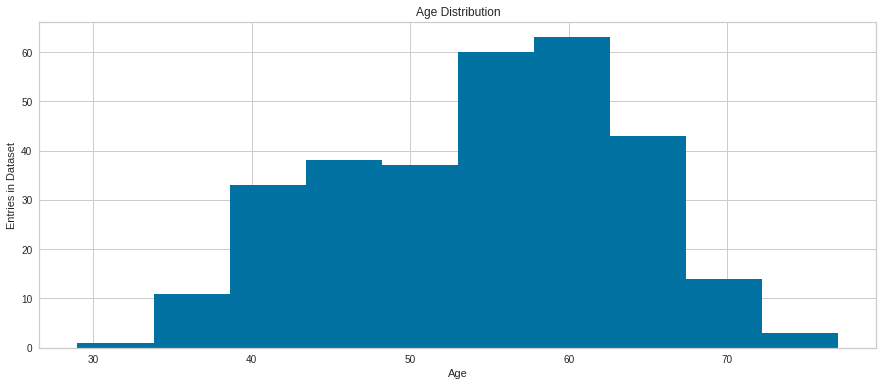

In [298]:
# Create a new figure and axis object with a custom size
fig, ax = plt.subplots(figsize=(15,6))

# Plot a histogram of the 'age' column in the 'data' DataFrame using the specified axis
data["age"].hist(ax=ax)

# Add an x-label to the plot
plt.xlabel("Age")

# Add a y-label to the plot
plt.ylabel("Entries in Dataset")

# Add a title to the plot
plt.title("Age Distribution");

In [299]:
# For getting the info of age distribution based on sex
fig = go.Figure()

# For age distribution independent of the sex in green color
fig.add_trace(go.Box(y=data['age'].values , name='Age', marker_color = 'blue',boxmean=True))

# For age distribution dependent of the male in blue color
fig.add_trace(go.Box(y=data[data['sex']==1]['age'].values, name ='Male only', marker_color = 'green', boxmean = True))

# For age distribution dependent of the male in red color
fig.add_trace(go.Box(y=data[data['sex']==0]['age'].values, name ='Female only', marker_color = 'red', boxmean = True))

fig.update_layout(title = 'Age Distribution(all)', yaxis_title = 'Age', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

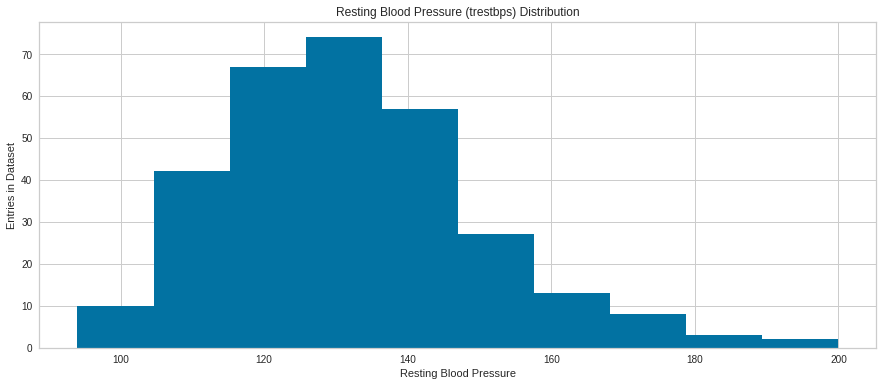

In [300]:
# Create a new figure and axis object with a custom size
fig, ax = plt.subplots(figsize=(15,6))

# Plot a histogram of the 'trestbps' column in the 'data' DataFrame using the specified axis
data["trestbps"].hist(ax=ax)

# Add an x-label to the plot
plt.xlabel("Resting Blood Pressure")

# Add a y-label to the plot
plt.ylabel("Entries in Dataset")

# Add a title to the plot
plt.title("Resting Blood Pressure (trestbps) Distribution");

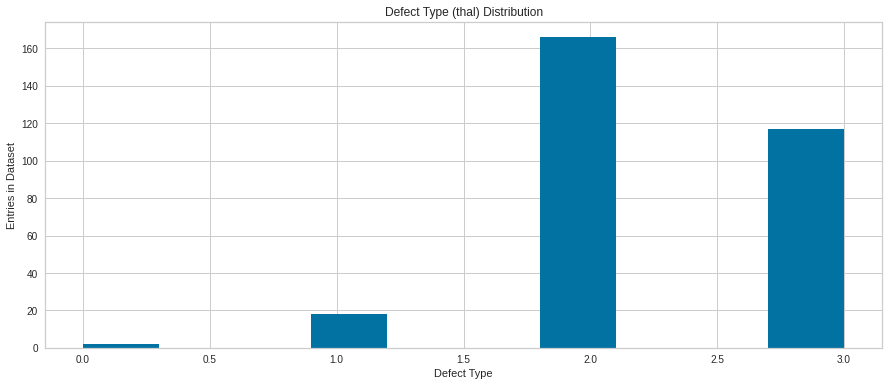

In [301]:
# Similar plot for attribute "thal"
feg,ax=plt.subplots(figsize=(15,6))
data["thal"].hist(ax=ax)
plt.xlabel("Defect Type")
plt.ylabel("Entries in Dataset")
plt.title("Defect Type (thal) Distribution");

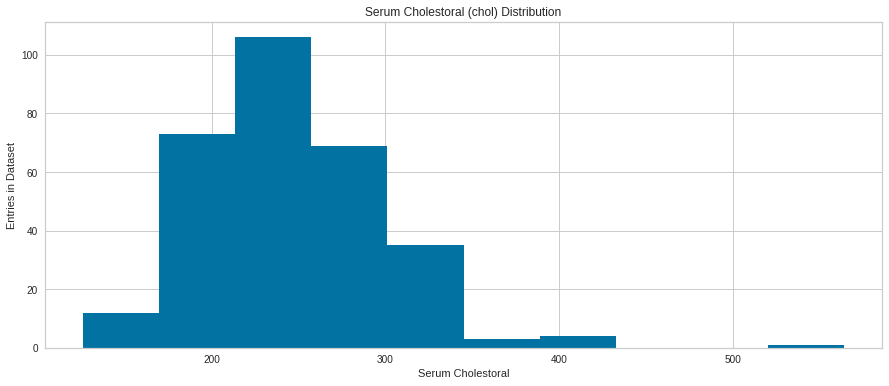

In [302]:
# Similar plot for attribute "chol"
feg,ax=plt.subplots(figsize=(15,6))
data["chol"].hist(ax=ax)
plt.xlabel("Serum Cholestoral")
plt.ylabel("Entries in Dataset")
plt.title("Serum Cholestoral (chol) Distribution");

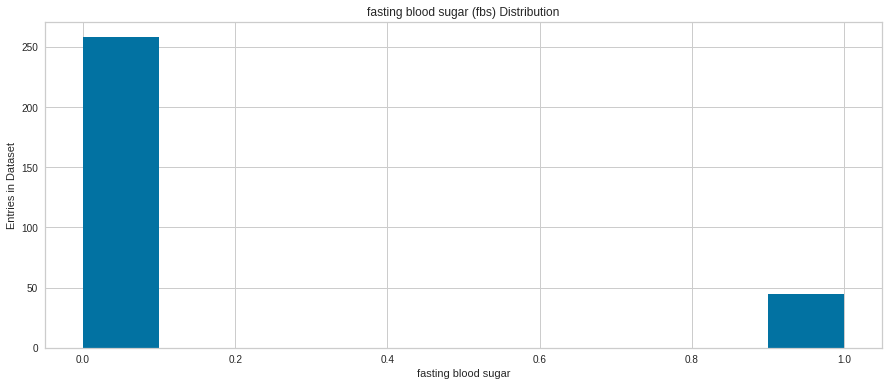

In [303]:
# Similar plot for attribute "fbs"
feg,ax=plt.subplots(figsize=(15,6))
data["fbs"].hist(ax=ax)
plt.xlabel("fasting blood sugar")
plt.ylabel("Entries in Dataset")
plt.title("fasting blood sugar (fbs) Distribution");

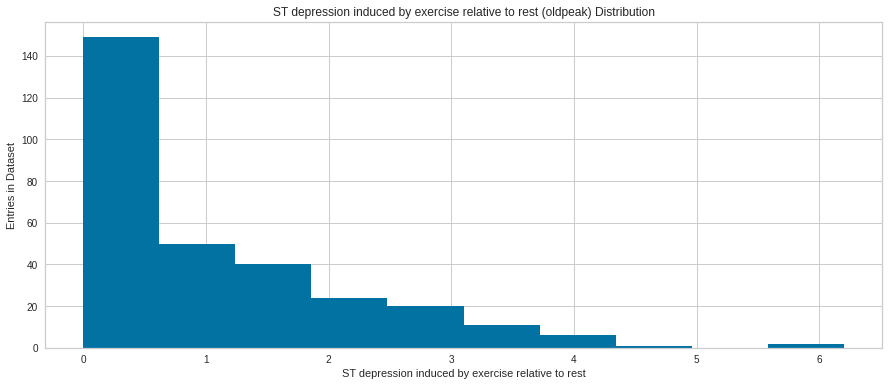

In [304]:
# Similar plot for attribute "oldpeak"
feg,ax=plt.subplots(figsize=(15,6))
data["oldpeak"].hist(ax=ax)
plt.xlabel("ST depression induced by exercise relative to rest")
plt.ylabel("Entries in Dataset")
plt.title("ST depression induced by exercise relative to rest (oldpeak) Distribution");

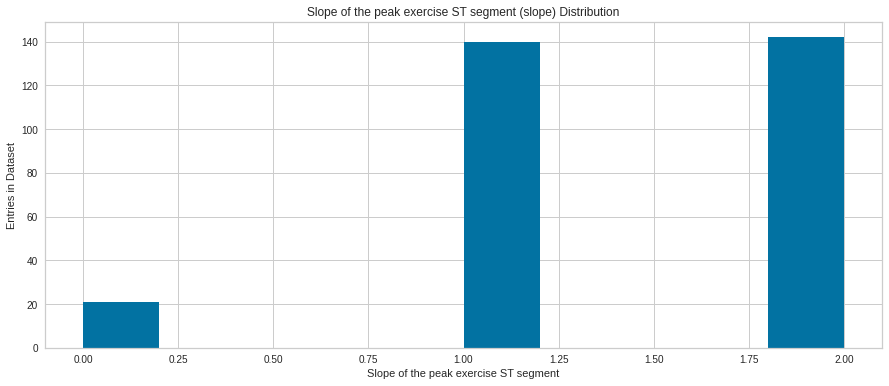

In [305]:
# Similar plot for attribute "oldpeak"
feg,ax=plt.subplots(figsize=(15,6))
data["slope"].hist(ax=ax)
plt.xlabel("Slope of the peak exercise ST segment")
plt.ylabel("Entries in Dataset")
plt.title("Slope of the peak exercise ST segment (slope) Distribution");

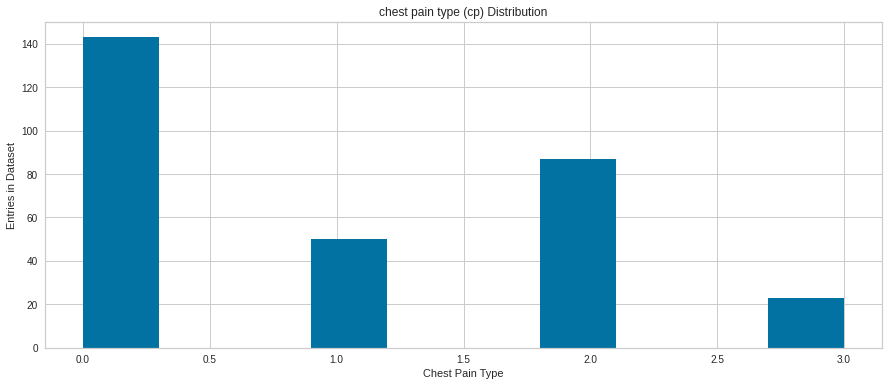

In [306]:
# Similar plot for attribute "cp"
feg,ax=plt.subplots(figsize=(15,6))
data["cp"].hist(ax=ax)
plt.xlabel("Chest Pain Type")
plt.ylabel("Entries in Dataset")
plt.title("chest pain type (cp) Distribution");

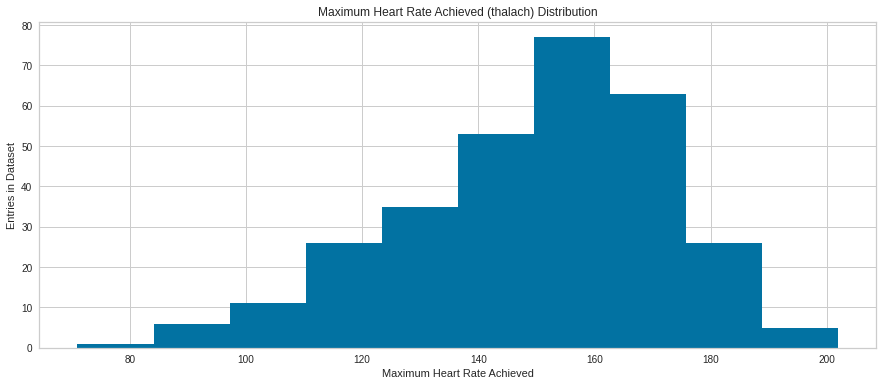

In [307]:
# Similar plot for attribute "thalach"
feg,ax=plt.subplots(figsize=(15,6))
data["thalach"].hist(ax=ax)
plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Entries in Dataset")
plt.title("Maximum Heart Rate Achieved (thalach) Distribution");

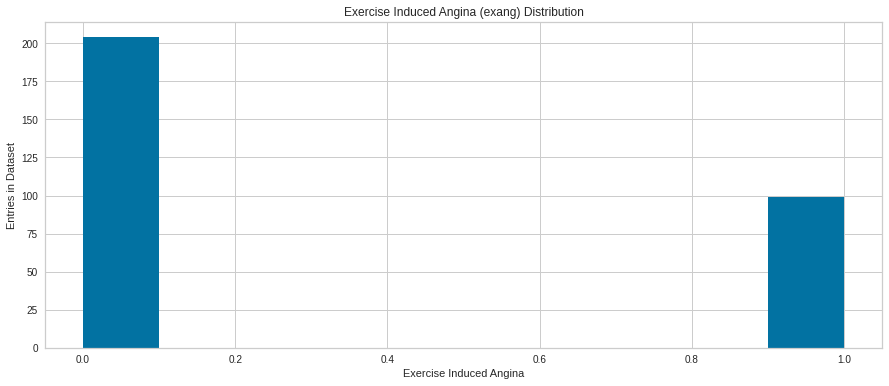

In [308]:
# Similar plot for attribute "exang"
feg,ax=plt.subplots(figsize=(15,6))
data["exang"].hist(ax=ax)
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Entries in Dataset")
plt.title("Exercise Induced Angina (exang) Distribution");

Text(0.5, 1.0, 'diagnosis of heart disease (num) Distribution')

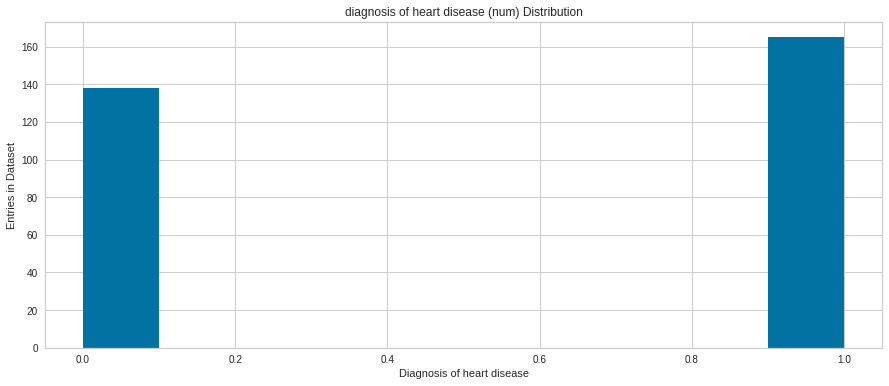

In [309]:
# Similar plot for target attribute "num"
feg,ax=plt.subplots(figsize=(15,6))
data["num"].hist(ax=ax)
plt.xlabel("Diagnosis of heart disease")
plt.ylabel("Entries in Dataset")
plt.title("diagnosis of heart disease (num) Distribution")

In [310]:
# Create a new empty figure object using the Plotly library
fig = go.Figure()

# Add a violin plot of cholesterol levels for all patients to the figure with a custom name and color
fig.add_trace(go.Violin(y=data['chol'].values , name='All Patient', marker_color = 'green'))

# Add a violin plot of cholesterol levels for patients with no disease to the figure with a custom name and color
fig.add_trace(go.Violin(y=data[data['num']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))

# Add a violin plot of cholesterol levels for patients with heart disease to the figure with a custom name and color
fig.add_trace(go.Violin(y=data[data['num'] ==1]['chol'].values, name ='Heart Disease', marker_color = 'red'))

# Update the layout of the figure with a custom title and y-axis label
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level', title_x = 0.5)

# Update the x-axis of the figure with custom styling options
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

# Update the y-axis of the figure with custom styling options
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

# Display the figure object
fig.show()

In [311]:
# continuous and categorical variables
cont_var = ['age','trestbps','chol','thalach','oldpeak']
cat_var = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

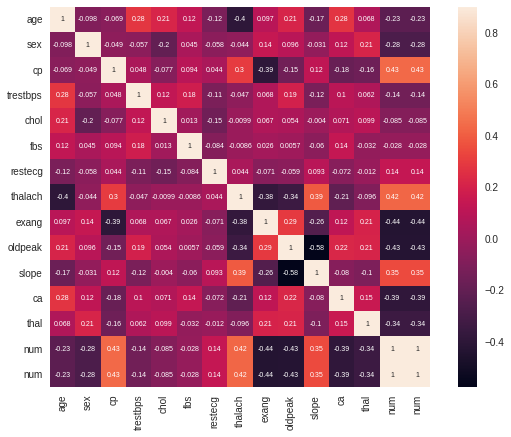

In [312]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate 'data' and 'num' columns and compute the Pearson correlation matrix
corrmat = pd.concat([data,data['num']],axis=1).corr(method='pearson')

# Create a new figure with a size of 10x7 inches
plt.subplots(figsize=(10,7))

# Create a heatmap with correlation matrix 'corrmat'
# Set 'annot' to True to display correlation coefficients in each cell
# Set 'vmax' to 0.9 to limit the color scale range to -0.9 to 0.9
# Set 'square' to True to force square cells
# Set 'annot_kws' to modify the size of the annotations
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True, annot_kws={'size':7})

# Show the plot
plt.show()

In [313]:
# Re-reading the dataset for training and testing various models
data = pd.read_csv('/content/dataset.csv')
data.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [314]:
# Apply logarithmic transformation to 'trestbps', 'chol', and 'thalach' columns in the 'data' DataFrame
data['trestbps'] = np.log(data['trestbps'])
data['chol'] = np.log(data['chol'])
data['thalach'] = np.log(data['thalach'])

# Calculate the variance of the 'trestbps', 'chol', and 'thalach' columns in the 'data' DataFrame
np.var(data[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [315]:
# Assign all columns except for 'num' to the 'x' variable
x = data.drop(['num'], axis=1)

# Assign only the 'num' column to the 'y' variable
y = data['num']

In [316]:
# Split the data into training and testing sets with a 80/20 split, a random state of 807, and assign to respective variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=807)

# Initialize empty dictionaries for the accuracy, sensitivity, specificity, and ROC_AUC metrics
accuracy_dictionary = {}
sensitivity_dictionary = {}
specificity_dictionary = {}
ROC_AUC_dictionary = {}

# Random Forest

In [317]:
# Import the 'RandomForestClassifier' class from the 'ensemble' module in the 'sklearn' library, and the 'accuracy_score' function from the 'metrics' module in the 'sklearn' library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate a 'RandomForestClassifier' object with a random state, and assign to the 'model' variable
model = RandomForestClassifier(random_state=323)

# Fit the 'model' object to the training data
model.fit(x_train,y_train)

# Predict the target variable for the test data using the trained 'model', and assign to the 'y_pred_RF' variable
y_pred_RF = model.predict(x_test)

# Calculate the accuracy score between the predicted and actual target variable values, and assign to the 'accuracy' variable
accuracy = accuracy_score(y_test, y_pred_RF)

# Calculate the ROC AUC score between the predicted and actual target variable probabilities, and assign to the 'roc_auc' variable
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Calculate the number of true negatives (tn), false positives (fp), false negatives (fn), and true positives (tp) in the confusion matrix for the predicted and actual target variable values, and assign to their respective variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()

# Calculate the sensitivity (i.e., true positive rate) by dividing the number of true positives by the sum of true positives and false negatives, and assign to the 'sensitivity' variable
sensitivity = tp / (tp + fn)

# Calculate the specificity (i.e., true negative rate) by dividing the number of true negatives by the sum of true negatives and false positives, and assign to the 'specificity' variable
specificity = tn / (tn + fp)

# Print the accuracy, ROC AUC, sensitivity, and specificity metrics for the 'RandomForestClassifier' model
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Add the accuracy, sensitivity, specificity, and ROC AUC metrics for the 'RandomForestClassifier' model to their respective dictionaries
accuracy_dictionary["Random Forest"]= accuracy
sensitivity_dictionary["Random Forest"]= sensitivity
specificity_dictionary["Random Forest"]= specificity
ROC_AUC_dictionary["Random Forest"]= roc_auc

Accuracy: 0.9508196721311475
ROC AUC: 0.9707792207792209
Sensitivity: 0.9393939393939394
Specificity: 0.9642857142857143


# Gradient Boost

In [318]:
# Import the necessary libraries and load the data
# Assuming x_train, x_test, y_train, y_test are already loaded and split from the original dataset

# Define the Gradient Boosting Classifier model with the following hyperparameters
# 1. Random state for reproducibility of the results
# 2. Number of trees in the forest = 500
# 3. Maximum number of nodes allowed in each tree = 3
# 4. Loss function to be optimized = 'exponential'
# 5. Minimum number of samples required to be at a leaf node = 20
model = GradientBoostingClassifier(random_state=1, n_estimators=500, max_leaf_nodes=3, loss='exponential', min_samples_leaf=20)

# Fit the Gradient Boosting Classifier model on the training data
model.fit(x_train, y_train)

# Predict the target variable on the test data using the trained model
y_pred_GB = model.predict(x_test)

# Calculate the accuracy of the model using the predicted and actual values of the target variable
accuracy = accuracy_score(y_test, y_pred_GB)

# Calculate the ROC AUC score of the model using the predicted probabilities of the target variable on the test data
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Calculate the confusion matrix values of the model using the predicted and actual values of the target variable
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_GB).ravel()

# Calculate the sensitivity of the model using the confusion matrix values
sensitivity = tp / (tp + fn)

# Calculate the specificity of the model using the confusion matrix values
specificity = tn / (tn + fp)

# Print the values of the metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Store the metric values in separate dictionaries for each model for comparison purposes
accuracy_dictionary["Gradient Boost"]= accuracy
sensitivity_dictionary["Gradient Boost"]= sensitivity
specificity_dictionary["Gradient Boost"]= specificity
ROC_AUC_dictionary["Gradient Boost"]= roc_auc

Accuracy: 0.9016393442622951
ROC AUC: 0.9577922077922078
Sensitivity: 0.9393939393939394
Specificity: 0.8571428571428571


# Adaboost

In [319]:
# Import the necessary libraries and load the data
# Assuming x_train, x_test, y_train, y_test are already loaded and split from the original dataset

# Define the AdaBoost Classifier model with the following hyperparameters
# 1. Number of estimators (weak learners) in the ensemble = 3
model = AdaBoostClassifier(n_estimators=3)

# Fit the AdaBoost Classifier model on the training data
model.fit(x_train, y_train)

# Predict the target variable on the test data using the trained model
y_pred_AB = model.predict(x_test)

# Calculate the accuracy of the model using the predicted and actual values of the target variable
accuracy = accuracy_score(y_test, y_pred_AB)

# Calculate the ROC AUC score of the model using the predicted probabilities of the target variable on the test data
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Calculate the confusion matrix values of the model using the predicted and actual values of the target variable
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_AB).ravel()

# Calculate the sensitivity of the model using the confusion matrix values
sensitivity = tp / (tp + fn)

# Calculate the specificity of the model using the confusion matrix values
specificity = tn / (tn + fp)

# Print the values of the metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Store the metric values in separate dictionaries for each model for comparison purposes
accuracy_dictionary["Adaboost"]= accuracy
sensitivity_dictionary["Adaboost"]= sensitivity
specificity_dictionary["Adaboost"]= specificity
ROC_AUC_dictionary["Adaboost"]= roc_auc

Accuracy: 0.9016393442622951
ROC AUC: 0.9231601731601732
Sensitivity: 0.9393939393939394
Specificity: 0.8571428571428571


#Extra Trees Classifier

In [320]:
# Import the necessary libraries and load the data
# Assuming x_train, x_test, y_train, y_test are already loaded and split from the original dataset

# Define the Extra Trees Classifier model with the following hyperparameters
# 1. Number of estimators (decision trees) in the ensemble = 15
# 2. Random state for reproducibility of results = 47
model = ExtraTreesClassifier(n_estimators=15, random_state=47)

# Fit the Extra Trees Classifier model on the training data
model.fit(x_train, y_train)

# Predict the target variable on the test data using the trained model
y_pred_ET = model.predict(x_test)

# Calculate the accuracy of the model using the predicted and actual values of the target variable
accuracy = accuracy_score(y_test, y_pred_ET)

# Calculate the ROC AUC score of the model using the predicted probabilities of the target variable on the test data
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Calculate the confusion matrix values of the model using the predicted and actual values of the target variable
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ET).ravel()

# Calculate the sensitivity of the model using the confusion matrix values
sensitivity = tp / (tp + fn)

# Calculate the specificity of the model using the confusion matrix values
specificity = tn / (tn + fp)

# Print the values of the metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Store the metric values in separate dictionaries for each model for comparison purposes
accuracy_dictionary["Extra Trees Classifier"]= accuracy
sensitivity_dictionary["Extra Trees Classifier"]= sensitivity
specificity_dictionary["Extra Trees Classifier"]= specificity
ROC_AUC_dictionary["Extra Trees Classifier"]= roc_auc


Accuracy: 0.9016393442622951
ROC AUC: 0.9707792207792207
Sensitivity: 0.9696969696969697
Specificity: 0.8214285714285714


# Decision Trees

In [321]:
# Import the necessary libraries and modules

# Create an instance of the Decision Tree Classifier (DTC) model with maximum depth=3, minimum samples per leaf=5, entropy criterion, minimum samples for splitting=5, random splitter, and random_state=1 for reproducibility
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,splitter='random', random_state=1)

# Train the DTC model using the training data (x_train, y_train)
model.fit(x_train, y_train)

# Use the trained DTC model to make predictions on the test data (x_test)
# The predicted values are stored in y_pred_DTC
y_pred_DTC = model.predict(x_test)

# Compute the accuracy score using the actual test labels (y_test) and the predicted labels (y_pred_DTC)
accuracy = accuracy_score(y_test, y_pred_DTC)

# Compute the ROC AUC score using the actual test labels (y_test) and the predicted class probabilities (model.predict_proba(x_test))
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Compute the true negative (tn), false positive (fp), false negative (fn), and true positive (tp) rates using the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DTC).ravel()

# Compute the sensitivity (true positive rate) and specificity (true negative rate) using the tn, fp, fn, and tp values from the confusion matrix
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the computed evaluation metrics: accuracy, ROC AUC, sensitivity, and specificity
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Store the computed evaluation metrics in dictionaries for later analysis or comparison with other models
accuracy_dictionary["Decision Trees"] = accuracy
sensitivity_dictionary["Decision Trees"] = sensitivity
specificity_dictionary["Decision Trees"] = specificity
ROC_AUC_dictionary["Decision Trees"] = roc_auc


Accuracy: 0.819672131147541
ROC AUC: 0.8571428571428572
Sensitivity: 0.9393939393939394
Specificity: 0.6785714285714286


# Gaussian Naive Bayes

In [322]:
# Import the necessary libraries and load the data
# Assuming x_train, x_test, y_train, y_test are already loaded and split from the original dataset

# Define the GNB model with the following hyperparameters
# 1. Smoothing parameter for variance regularization = 0.1
model = GaussianNB(var_smoothing=0.1)

# Fit the GNB model on the training data
model.fit(x_train, y_train)

# Predict the target variable on the test data using the trained model
y_pred_GNB = model.predict(x_test)

# Calculate the accuracy of the model using the predicted and actual values of the target variable
accuracy = accuracy_score(y_test, y_pred_GNB)

# Calculate the ROC AUC score of the model using the predicted probabilities of the target variable on the test data
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Calculate the confusion matrix values of the model using the predicted and actual values of the target variable
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_GNB).ravel()

# Calculate the sensitivity of the model using the confusion matrix values
sensitivity = tp / (tp + fn)

# Calculate the specificity of the model using the confusion matrix values
specificity = tn / (tn + fp)

# Print the values of the metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Store the metric values in separate dictionaries for each model for comparison purposes
accuracy_dictionary["GNB"]= accuracy
sensitivity_dictionary["GNB"]= sensitivity
specificity_dictionary["GNB"]= specificity
ROC_AUC_dictionary["GNB"]= roc_auc

Accuracy: 0.8688524590163934
ROC AUC: 0.9199134199134199
Sensitivity: 0.9393939393939394
Specificity: 0.7857142857142857


# Support Vector Machines

In [323]:
# Import the necessary libraries and modules

# Create an instance of the Support Vector Machine (SVM) classifier model with linear kernel and C=10
# Also, set probability to True to enable the calculation of ROC AUC score later
model = SVC(kernel='linear', C=10, probability=True)

# Train the SVM classifier model using the training data (x_train, y_train)
model.fit(x_train, y_train)

# Use the trained SVM classifier model to make predictions on the test data (x_test)
# The predicted values are stored in y_pred_SVM
y_pred_SVM = model.predict(x_test)

# Compute the accuracy score using the actual test labels (y_test) and the predicted labels (y_pred_SVM)
accuracy = accuracy_score(y_test, y_pred_SVM)

# Compute the ROC AUC score using the actual test labels (y_test) and the predicted class probabilities (model.predict_proba(x_test))
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Compute the true negative (tn), false positive (fp), false negative (fn), and true positive (tp) rates using the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_SVM).ravel()

# Compute the sensitivity (true positive rate) and specificity (true negative rate) using the tn, fp, fn, and tp values from the confusion matrix
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the computed evaluation metrics: accuracy, ROC AUC, sensitivity, and specificity
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Store the computed evaluation metrics in dictionaries for later analysis or comparison with other models
accuracy_dictionary["SVM"] = accuracy
sensitivity_dictionary["SVM"] = sensitivity
specificity_dictionary["SVM"] = specificity
ROC_AUC_dictionary["SVM"] = roc_auc

Accuracy: 0.9180327868852459
ROC AUC: 0.9496753246753247
Sensitivity: 0.9393939393939394
Specificity: 0.8928571428571429


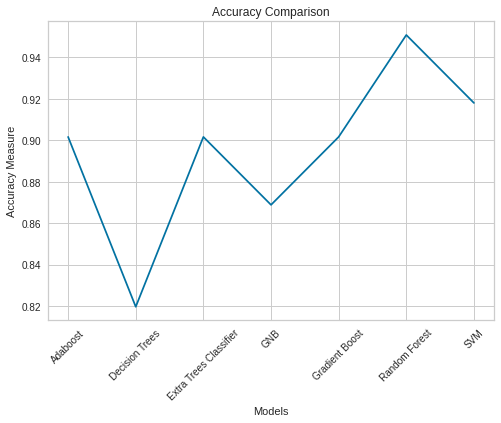

In [324]:
# Get a list of the accuracy values from the accuracy dictionary
accuracy = accuracy_dictionary.items()

# Sort the list of accuracy values by key (i.e., model name)
accuracy = sorted(accuracy) 

# Unpack the keys and values from the sorted accuracy list into separate x and y lists
x, y = zip(*accuracy) 

# Create a line plot of the accuracy measures for each model
plt.plot(x, y)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add x- and y-axis labels
plt.xlabel("Models")
plt.ylabel("Accuracy Measure")

# Add a title to the plot
plt.title("Accuracy Comparison")

# Display the plot
plt.show()

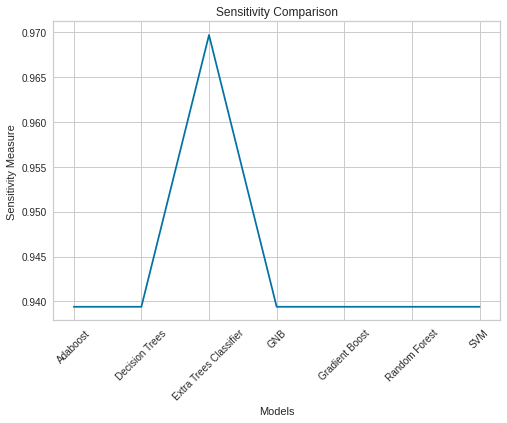

In [325]:
# Get a list of the sensitivity values from the sensitivity dictionary
sstvy = sensitivity_dictionary.items()

# Sort the list of sensitivity values by key (i.e., model name)
sstvy = sorted(sstvy) 

# Unpack the keys and values from the sorted sensitivity list into separate x and y lists
x, y = zip(*sstvy) 

# Create a line plot of the sensitivity measures for each model
plt.plot(x, y)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add x- and y-axis labels
plt.xlabel("Models")
plt.ylabel("Sensitivity Measure")

# Add a title to the plot
plt.title("Sensitivity Comparison")

# Display the plot
plt.show()

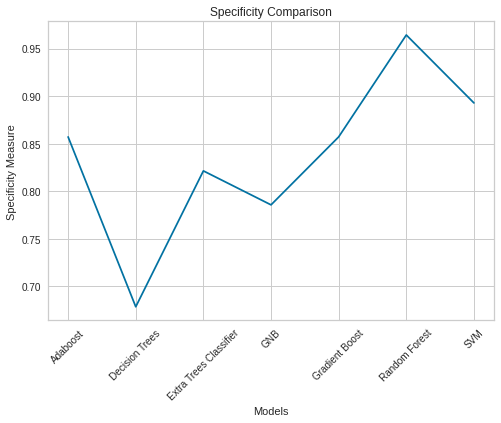

In [326]:
# Get a list of the specificity values from the specificity dictionary
sp = specificity_dictionary.items()

# Sort the list of specificity values by key (i.e., model name)
sp = sorted(sp) 

# Unpack the keys and values from the sorted specificity list into separate x and y lists
x, y = zip(*sp) 

# Create a line plot of the specificity measures for each model
plt.plot(x, y)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add x- and y-axis labels
plt.xlabel("Models")
plt.ylabel("Specificity Measure")

# Add a title to the plot
plt.title("Specificity Comparison")

# Display the plot
plt.show()

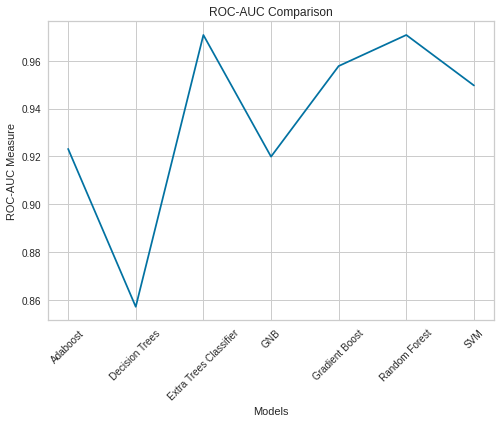

In [327]:
# Get a list of the ROC-AUC values from the ROC-AUC dictionary
roc = ROC_AUC_dictionary.items()

# Sort the list of ROC-AUC values by key (i.e., model name)
roc = sorted(roc) 

# Unpack the keys and values from the sorted ROC-AUC list into separate x and y lists
x, y = zip(*roc) 

# Create a line plot of the ROC-AUC measures for each model
plt.plot(x, y)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add x- and y-axis labels
plt.xlabel("Models")
plt.ylabel("ROC-AUC Measure")

# Add a title to the plot
plt.title("ROC-AUC Comparison")

# Display the plot
plt.show()

# Final Funtion

In [328]:
# Define a function for heart disease classification using a trained model and test data
def heart_disease_classification(x_test, model):
  
  # Check that the test data has the correct number of features
  if(len(x_test)==13):
    
    # Use the trained model to predict the class probabilities for the test data
    y_prob_pred=model.predict_proba([x_test])
    
    # Print the predicted probabilities for each class
    print("Probability of NOT GETTING a heart disease:", y_prob_pred[0][0])
    print("Probability of GETTING a heart disease:", y_prob_pred[0][1])

    return
  
  # If the test data has the wrong number of features, print an error message and return nothing
  else:
    print("List should contain 13 parameters. Please check!")
    return

In [329]:
# Sample list containing 13 values corresponding to age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal respectively
x_check=[70,1,0,4.976734,5.159055,0,1,4.828314,1,2.6,0,0,3]

# Copy the model code for training and predicting
# Currently the code is for our best performing model Random Forest
model = RandomForestClassifier(random_state=323)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Run the function by passing your list of attribute values and the model respectively
heart_disease_classification(x_check,model)

Probability of NOT GETTING a heart disease: 0.94
Probability of GETTING a heart disease: 0.06
